In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

from datetime import timedelta


<Axes: >

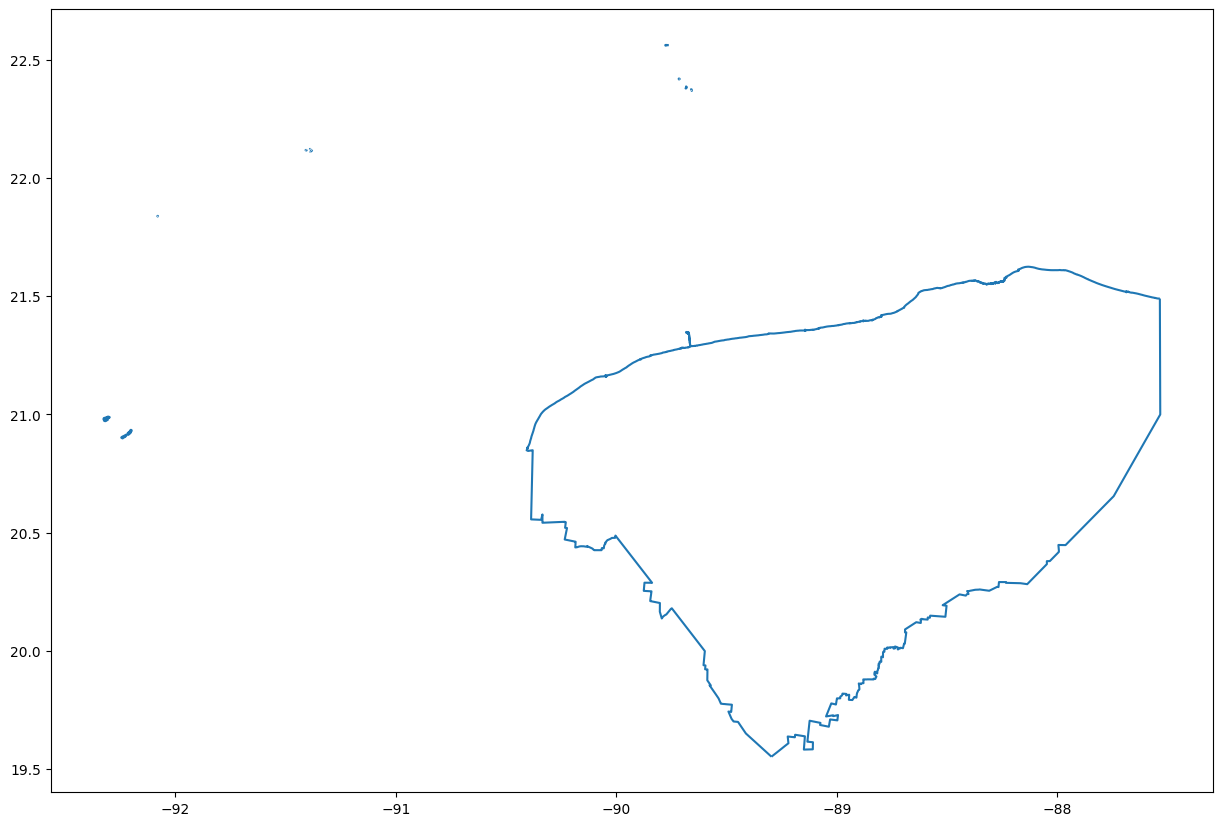

In [2]:
map = gpd.read_file('conjunto_de_datos/limite250_l.shp')
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax)

In [4]:
data = pd.read_csv('data/2023.csv')

data


,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Variedad,Etapa_Fenologica,...,ProductorID,AnoMapa,Version,SitioID,ActividadID,ID,AddRecord,ChangeRecord,SMARTPHONE,Anual
0,1/3/2023,20.85595,-90.25643,179_VS00-31-011-0012,CELESTUN,CELESTUN,FELIX AGUILAR,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,901755,2023,45294.6183,318,308,742976,44935.42503,44935.42784,0,NaN
1,1/3/2023,20.85498,-90.26168,179_VS00-31-011-0011,CELESTUN,CELESTUN,AGUSTIN AGUILAR MAY,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,632651,2023,45294.6183,318,308,742977,44935.42517,44935.42790,0,NaN
2,1/3/2023,20.81349,-90.19725,179_VS00-31-011-0005,CELESTUN,CELESTUN,MANUEL SOLIS,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,411167,2023,45294.6183,318,308,742980,44935.42572,44935.42805,0,NaN
3,1/3/2023,20.80072,-90.19945,179_VS00-31-011-0009,CELESTUN,CELESTUN,GUADALUPE DE JESUS PEREZ VELA,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,901757,2023,45294.6183,318,308,742981,44935.42585,44935.42813,0,NaN
4,1/3/2023,20.83347,-90.21466,179_VS00-31-011-0007,CELESTUN,CELESTUN,MARIO CEBALLOS PINTO,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,747935,2023,45294.6183,318,308,742978,44935.42534,44935.42794,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,12/15/2023,20.97377,-89.69087,179_VS00-31-050-0058,MERIDA,MERIDA,JORGE HERNANDEZ,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,315368,2023,45294.6183,318,309,800579,45276.48083,45279.36051,0,NaN
8980,12/16/2023,20.93462,-89.68981,179_VS00-31-050-0060,MERIDA,MERIDA,DIEGO ADOLFO CHUC,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,2232062,2023,45294.6183,318,309,800682,45277.34451,45277.34675,0,NaN
8981,12/18/2023,20.92261,-89.60760,179_VS00-31-050-0062,MERIDA,MERIDA,ANDRES VILLANUEVA LOPEZ,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,2232355,2023,45294.6183,318,309,801025,45279.34273,45279.34499,0,NaN
8982,12/19/2023,20.91877,-89.61163,179_VS00-31-050-0063,MERIDA,MERIDA,JORGE VALENCIA,MONTE,VARIOS,DESARROLLO VEGETATIVO,...,463935,2023,45294.6183,318,309,802715,45289.54696,45289.54840,0,NaN


In [12]:
data = data[data['Actividad_Realizada'] == 'Exploración']

data['Resultado'].value_counts()

Resultado
Negativo      6631
Positivo      1168
En proceso      16
Name: count, dtype: int64

In [15]:
data.drop(data[data['Resultado']=='En proceso'].index, inplace=True)

In [50]:
data_output = data[['Fecha','Latitud','Longitud','Resultado']]
data_output['Fecha'] = data_output['Fecha'].astype('datetime64[s]')
data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)
data_output

C:\Users\super\AppData\Local\Temp\ipykernel_2324\433945542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Fecha'] = data_output['Fecha'].astype('datetime64[s]')
C:\Users\super\AppData\Local\Temp\ipykernel_2324\433945542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Fecha_inicio'] = data_output['Fecha'] - timedelta(days=96)


,Fecha,Latitud,Longitud,Resultado,Fecha_inicio
0,2023-01-03,20.85595,-90.25643,Negativo,2022-09-29
1,2023-01-03,20.85498,-90.26168,Negativo,2022-09-29
2,2023-01-03,20.81349,-90.19725,Negativo,2022-09-29
3,2023-01-03,20.80072,-90.19945,Negativo,2022-09-29
4,2023-01-03,20.83347,-90.21466,Negativo,2022-09-29
...,...,...,...,...,...
7974,2023-12-28,20.97265,-88.97319,Negativo,2023-09-23
7975,2023-12-29,20.98016,-88.96617,Negativo,2023-09-24
7976,2023-12-29,20.95807,-88.89866,Negativo,2023-09-24
7977,2023-12-28,20.99703,-88.97471,Negativo,2023-09-23


In [72]:
data_filtered = pd.DataFrame(np.unique(data_output[['Latitud', 'Longitud']], axis=0), columns=['Latitud','Longitud'])
data_filtered.to_csv('unique_points.csv',index=False)

C:\Users\super\AppData\Local\Temp\ipykernel_2324\2608703572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
C:\Users\super\AppData\Local\Temp\ipykernel_2324\2608703572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)


<Axes: xlabel='Mes'>

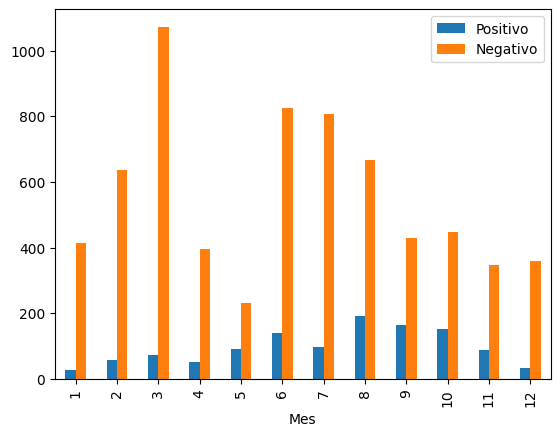

In [62]:
#data_output.groupby(data_output["Fecha"].dt.month)['Fecha'].count().plot(kind="bar", xlabel="Mes")
data_output['Positivo'] = np.where(data_output['Resultado']=='Positivo',1,0)
data_output['Negativo'] = np.where(data_output['Resultado']=='Negativo',1,0)

data_output.groupby(data_output["Fecha"].dt.month).agg({'Positivo':'sum','Negativo':'sum'}).plot(kind="bar", xlabel="Mes")


C:\Users\super\AppData\Local\Temp\ipykernel_2324\4105789646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


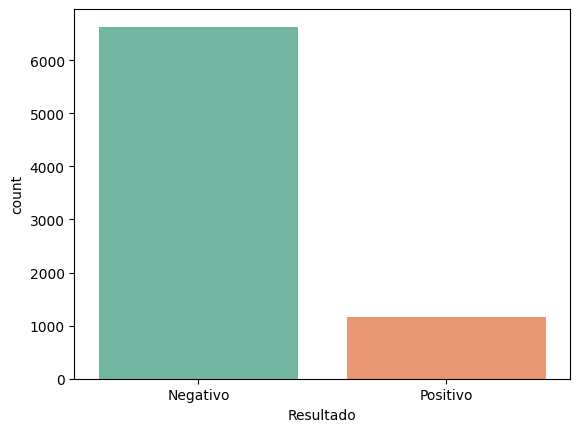

In [16]:
ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


In [8]:
data_map = data[["Latitud", "Longitud","Resultado"]]
data_map
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_map['Longitud'], data_map['Latitud'])]
geo_df = gpd.GeoDataFrame(data_map, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 


c:\code\locust\.venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


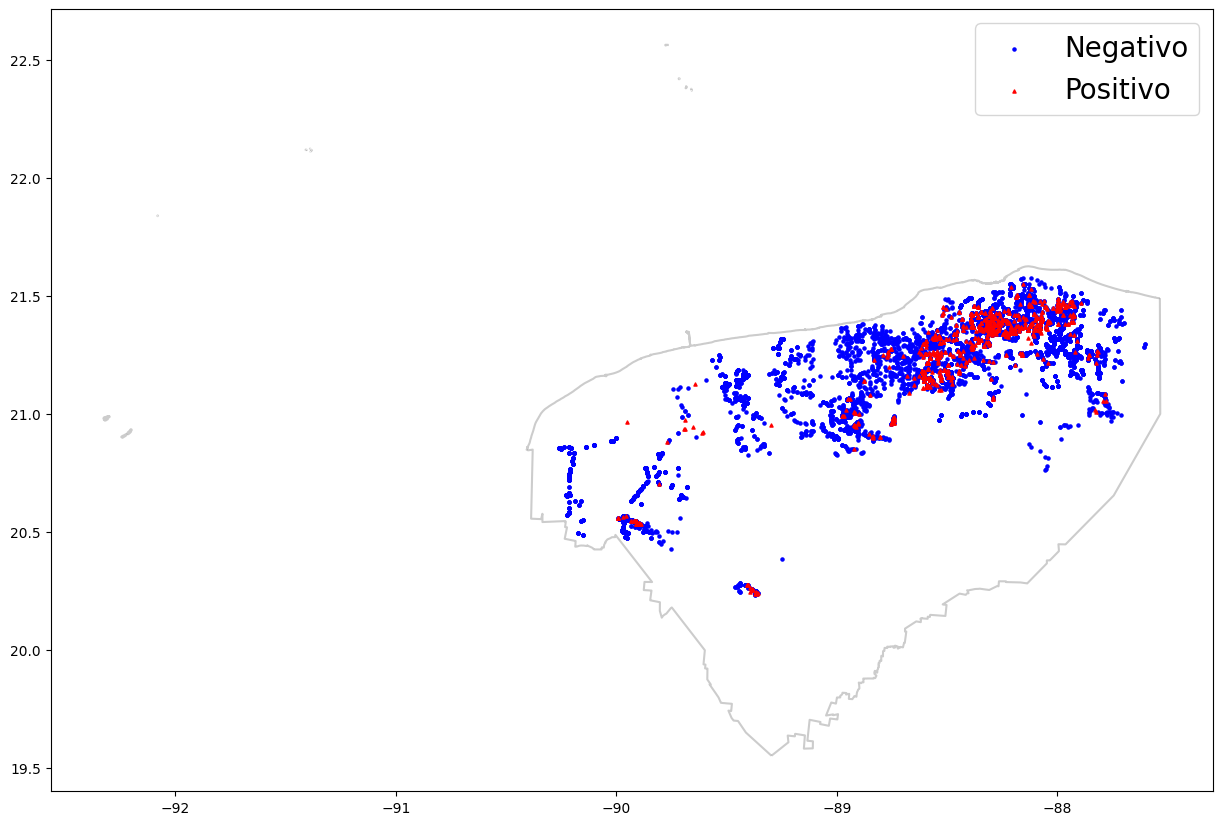

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Resultado'] == 'Negativo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='blue', 
                                       marker='o', 
                                       label='Negativo')
geo_df[geo_df['Resultado'] == 'Positivo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='^', 
                                       label='Positivo')
plt.legend(prop={'size':20})


<Axes: >

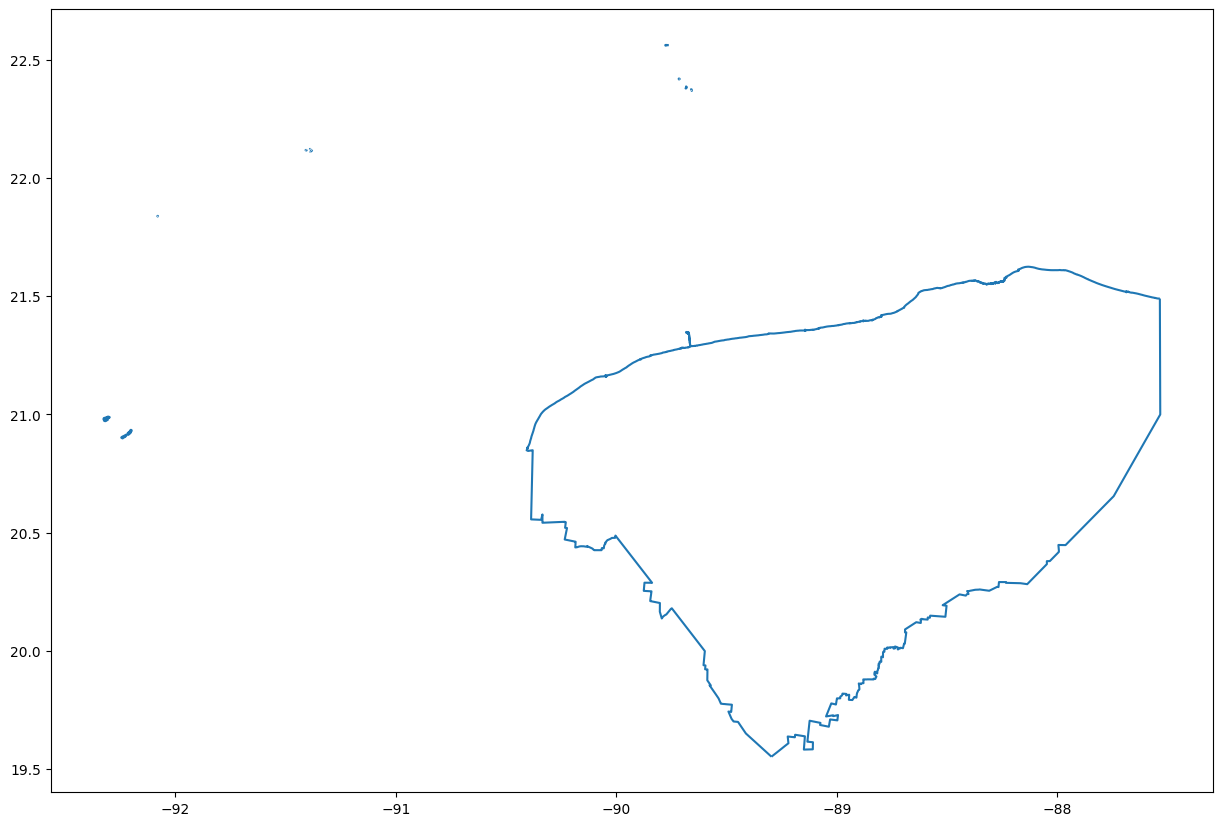